<a href="https://colab.research.google.com/github/LM1997610/NeuralNetworks/blob/main/ARIS_hw_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip -q install powerlaw

In [2]:
import os
import sys
import random
import numpy as np
import networkx as nx
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import powerlaw as pwl

## 1) The Barabassi-Albert Preferential Attachment Model:

Generalization of the model where a node is selected at time $ t+1 $ with probability that is proportional to its degree plus a constant $c$,\
Node *u* is selected with probability:

$$ \frac{{d_u + c}}{{\sum\limits_{\substack{w \in V_{t-1}}}(d_w + c)}} = \frac{{d_u +c}}{{(t-1)(2\ell +c)}}$$




Need to define:
- $ nk(t) $: mean number of nodes at time $t$ with degree $k$
- $ pk(t) = \frac{n_k(t)}{t} $: mean ratio of nodes at time t with degree $k$ <br/><br/>

For $ k > \ell $ we have:

$$ n_k(t+1)=n_k(t)+n_{k-1}(t)\frac{k+c-1}{(2\ell+c)t}\ell -n_k(t) \frac{k+c}{(2\ell+c)t}\ell $$
<br/><br/>
$$ (t+1)p_k(t+1)=t p_k(t) +p_{k-1}(t)\frac{k+c-1}{2\ell+c}\ell -p_k(t)\frac{k+c}{2\ell+c}\ell $$

From which we get:

$$ p_k = p_{k-1} \frac{k-1+c}{k+2+c+c/ℓ} $$

For $ k = \ell $:

$$ p_{\ell} = \frac{2+c/ℓ}{\ell+2+c+c/ℓ} $$

Bringing them together for $ k \ge \ell $:

$$ p_k = \frac{2+c/ℓ}{(k+2+c+c/ℓ)} \frac{\ell+c}{(k+3+c+c/ℓ)} \frac{\ell+c+1}{(k+4+c+c/ℓ)}  $$
<br/><br/>
This shows that the degree distribution when t → ∞ is approximately a power law with exponent $3 + c/ℓ $


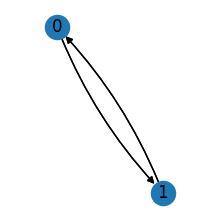

In [3]:
G = nx.MultiDiGraph()

G.add_node('0')
G.add_node('1')

G.add_edge('0', '1'); G.add_edge('0', '1')
G.add_edge('1', '0'); G.add_edge('1', '0')

pos = nx.spring_layout(G)

plt.figure(figsize=(2, 2))

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')

plt.show()

In [4]:
def prob_each_node(graph, time, l=4, c=0):

  degrees = dict(graph.degree())
  denominator = (time - 1)*(2*l + c)
  my_prob_list = [(x+c)/denominator for x in list(degrees.values())]

  return my_prob_list

In [5]:
c = 7
l = 4

times = range(2, 10000)

for t in tqdm(times):

  G.add_node(t)
  prob_vector = prob_each_node(G, time=t, l=l, c=c)
  selected_nodes = random.choices(list(G.nodes()), weights=prob_vector, k=4)

  for node in selected_nodes:
    G.add_edge(t, node)


  0%|          | 0/9998 [00:00<?, ?it/s]

In [6]:
degree_distrib = nx.degree_histogram(G)
nodes = [i for i in range(0, len(degree_distrib))]

degree_distrib = [degree_distrib[i]/G.number_of_nodes() for i in range(len(degree_distrib))]

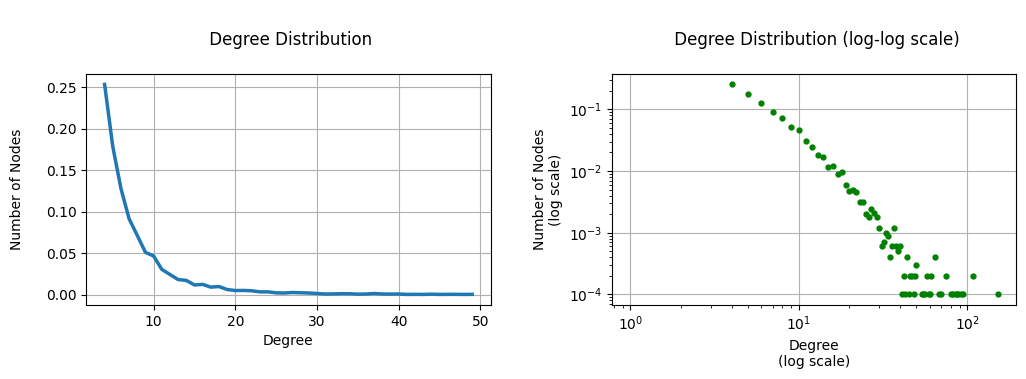

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 3))

ax1.plot(nodes[l:50], degree_distrib[l:50], '-', linewidth=2.5)
ax1.set_title('\n Degree Distribution\n')
ax1.set_xlabel('Degree\n')
ax1.set_ylabel('Number of Nodes\n')
ax1.grid()

ax2.plot(nodes, degree_distrib, 'o', markersize=3.5, color='green')
ax2.set_title('\n Degree Distribution (log-log scale)\n')
ax2.set_xlabel('Degree\n(log scale)')
ax2.set_ylabel('Number of Nodes\n(log scale)')
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.grid()

plt.subplots_adjust(wspace=0.3)
plt.show()

In [8]:
fit_function = pwl.Fit(list(dict(G.degree()).values()))

round(fit_function.power_law.alpha,2), 3+c/l

Calculating best minimal value for power law fit


(4.16, 4.75)

## 2) Densest subgraph, Minimum cut and Sparsest cut


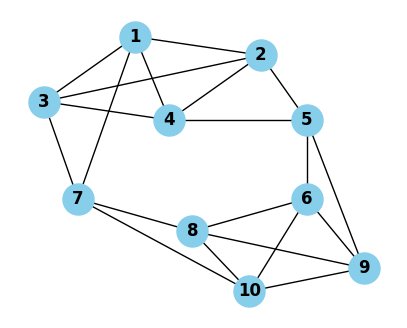

In [9]:
number_of_nodes = 10

G = nx.Graph()
G.add_nodes_from(range(1, number_of_nodes+1))

edges = [(1, 2), (1, 3), (1, 4), (1,7),
         (2, 3), (2, 4), (2,5),
         (3, 4), (3,7),
         (4, 5),
         (5, 6), (5,9),
         (6, 8), (6, 9), (6, 10),
         (7, 8), (7, 10),
         (8, 9), (8, 10),
         (9, 10)]                 #(11,3), (12,11), (11,8), (1,12),(11,9)]

G.add_edges_from(edges)

fixed_positions = {1:(2.0, 5.5), 2:(3.1, 5.1), 3:(1.2, 4.1), 4:(2.3, 3.7), 5:(3.5, 3.7),
                   6:(3.5, 2.0), 7:(1.5, 2.0), 8:(2.5, 1.3), 9:(4.0, 0.5), 10:(3.0, 0)}

fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed = fixed_positions.keys())

fig, ax = plt.subplots(figsize=(5,4))

nx.draw(G, with_labels=True, ax=ax, pos=pos,
        node_color='skyblue', font_color='black', font_weight='bold', font_size=12, node_size=500)

In [10]:
d_distrib = dict(G.degree())

print(f"Degree distribution: {d_distrib }")

Degree distribution: {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4}


In [11]:
def GreedyDensestSubgraph(Graph):

    print(f"Nodes in G: {set(G.nodes())}\n")

    S = set(Graph.nodes())
    sub_graph = set(Graph.nodes())

    while len(S) > 1:

        v_node = min(S, key=lambda v: Graph.subgraph(S).degree(v))

        S.remove(v_node)

        density_S = len(Graph.subgraph(S).edges()) / len(S)
        density_subgraph = len(Graph.subgraph(sub_graph).edges()) / len(sub_graph)

        if density_S >= density_subgraph:
          sub_graph = set(S)
          print(f" removed node: {str(v_node)}")

    print(f"\nDensest SubGraph: {sub_graph}")
    return sub_graph

In [12]:
densest_sgraph = GreedyDensestSubgraph(G)

Nodes in G: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


Densest SubGraph: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [13]:
adj_matrix = nx.to_numpy_array(G)

print(f'Adjacency matrix A -> shape={adj_matrix.shape}:\n')
print(f'{adj_matrix}')

Adjacency matrix A -> shape=(10, 10):

[[0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]


In [14]:
def Sparsest_Cut(A_matrix, grafo=False):

  D = np.eye(A_matrix.shape[0])

  normalized_laplacian_matrix = D - A_matrix/4  # L = I − 1/d * A

  eigenvalues, eigenvectors = np.linalg.eig(normalized_laplacian_matrix)
  vector = eigenvectors[:,1]

  sorted_indices = np.argsort(vector)
  sorted_values = vector[sorted_indices]

  c_one = [sorted_indices[x] for x in range(len(sorted_indices)) if sorted_values[x] > 0]
  c_two = [sorted_indices[x] for x in range(len(sorted_indices)) if sorted_values[x] < 0]

  # --- Cheeger’s inequality --- #

  lambda_2 = eigenvalues[1]

  conductance = nx.conductance(grafo, S=c_one, T=c_two)

  if (lambda_2/2 <= conductance) and (conductance <= np.sqrt(lambda_2*2)):

    print("Cheeger’s inequality holds:", end = " ")
    print(f"{np.round(lambda_2/2, 3).real} <= {conductance} <= {np.round(np.sqrt(lambda_2*2), 3).real}")

  return c_one, c_two

In [15]:
c1, c2 = Sparsest_Cut(adj_matrix, grafo = G)

Cheeger’s inequality holds: 0.625 <= 0.875 <= 1.581


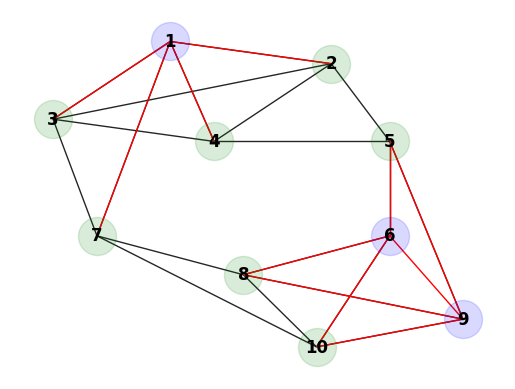

In [16]:
fig, ax = plt.subplots()

nodi_1 = [x+1 for x in c1]
nodi_2 = [x+1 for x in c2]

#pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, nodelist = nodi_1, node_size=750, alpha = 0.15, node_color='green', pos = pos)
nx.draw_networkx_nodes(G, nodelist = nodi_2, node_size=750, alpha = 0.15, node_color='blue', pos = pos)

nx.draw_networkx_edges(G, edgelist= [(u,v) for u,v in G.edges(nodi_1)], edge_color = "black", alpha=0.85, pos=pos)
nx.draw_networkx_edges(G, edgelist= [(u,v) for u,v in G.edges(nodi_2)], edge_color = "red", pos=pos)
text = nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

_ = ax.axis('off')

## 3) Friendship paradox:

An interesting phenomenon in **social networks** is
that a random person’s expected degree is smaller than the degree of her peers:

` Your friends are more popular than you are!`

Given an undirected graph $G = (V,E)$:

Let $X$ be a random variable representing the degree of a randomly selected node in the graph\
and $Y$ be a random variable representing the average degree of its neighbors.



Prove that $𝐸[𝑋]≤𝐸[𝑌]$ :

The expected value of $X$ is:
$$ \mu =  E[X] = \frac{1}{|V|} \sum_{i\in V} d_i = \frac{2|E|}{|V|} $$

Where the *sum of the degrees of all nodes* equals twice the number of edges in the graph.\
While its variance:

$$ \sigma_X^2 =\sum_{i\in V}(d_i- \mu)^2 \frac{1}{|V|} =  
\frac{1}{|V|} \sum_{i\in V}(d_i^2 -2\mu d_i +\mu^2) $$

$$ = \frac{1}{|V|} \left[\sum_{i}d_i^2 -4\mu\text{|E|} + \mu^2|V|\right] =$$

$$  = \frac{\sum_{i}d_i^2}{|V|} -2\mu \frac{2|E|}{|V|} + \mu^2 = $$
$$ = \frac{\sum_{i}d_i^2}{|V|}  -2\mu^2 + \mu^2 = \frac{\sum_{i}d_i^2}{|V|}- \mu^2 = \sigma_X^2 $$


And expected value $E[Y]$ is:

$$ \mu_Y = E[Y] = \frac{1}{2|E|} \sum_{i\in V}  \sum_{j \in S_i} d_j = \frac{1}{2|E|} \sum_{i\in V} d_i^2 $$

From the variance formula above we have: $ \sum\limits_{i=1}^{|V|}d_i^2 = (\sigma_X^2+\mu^2)|V| $ so we can rewrite:

$$  \mu_Y = E[Y] = \frac{(\sigma_X^2+\mu^2)|V|}{2|E|} = \frac{(\sigma_X^2+\mu^2)}{\mu} = \mu + \frac{\sigma_X^2}{\mu} $$

This proves that:

$$ \ \mu \leq \mu + \frac{\sigma_X^2}{\mu} = \mu_Y $$


We have that $ E[X] = E[Y] $ when $ \frac{\sigma^2}{\mu} = 0 $\
In this case the graph would be regular connected, this means that each node has same degree of its neighboring nodes

## 4)  Streaming Algorithm for Graph Connectivity:

A graph arrives as a stream of edges $ \mathcal{E} = e_1, e_2, ...$.\
Exactly one edge arrives at a time, with edge $e_i$ arriving at time $i$. Each edge $e_i$ consists on a pair of vertices $(u, v)$.

According to the **sliding window model** at each time $t$ only the $w$
most recent edges are considered active,  where $w$ is the window size.\
The graph that consists of the **active edges** at time $t$, given a window length $w$, is denoted with $ G(t,w) = (V,E(t,w)) $



To monitor the connectivity of the graph $G(t,w)$ I use a set of edges $C$ that represent a minimum path that connects all the nodes.

The tree defined by the edges in $C$ must remain **acyclic** at all times and should always consider the most recent edges arrived.

When a new edge arrives, I insert it into $C$ in any case and verify if it forms a cycle within $C$.\
If a cycle is detected, I remove the **oldest edge** from this cycle.\
To determine which edge is the oldest I need to keep records of the arrival timestamps of the edges in my set.

**To decide if the graph is connected**:\
After receiving a new edge at time $t+1$, the graph $G(t+1,w)$ is connected if, upon adding the edge to set $C$ as described above,\
there are no edges in $C$ with arrival timestamps older than $(t+1)-w$.

To check if a new edge closes a loop I used **DFS**

In [17]:
from IPython.display import Image
from collections import defaultdict

from helper import check_add_edge, do_plot, do_gif

In [18]:
folder_path = "graph_status"
os.makedirs(folder_path, exist_ok=True)

stream_edge = [("c","e"), ("b","d"), ("a","c"), ("c","b"), ("a","b"),
                ("c","d"), ("d","e"), ("b","e"), ("b","d"), ("c","e")]

  0%|          | 0/25 [00:00<?, ?it/s]

 t:6 - arrived: ('c', 'd')ERROEEE window 6
 t:7 - arrived: ('d', 'e')ERROEEE window 7
 t:8 - arrived: ('b', 'e')ERROEEE window 7
 t:9 - arrived: ('b', 'd')ERROEEE window 7
 t:10 - arrived: ('c', 'e')ERROEEE window 7
 t:11 - arrived: ('a', 'g')ERROEEE window 7
ERROEEE edge 5 [('a', 'g'), ('c', 'e'), ('b', 'd'), ('b', 'e'), ('a', 'b')]


NetworkXError: Node 'g' has no position.

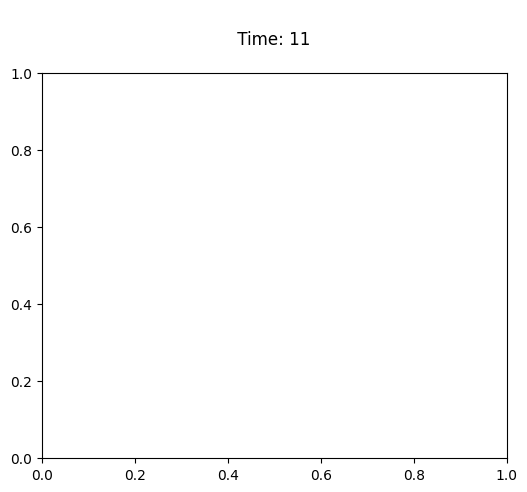

In [21]:
F = []
arrival_time = {}
window_size = 7

window = []
is_disconnected = False

times = range(0, 25)

for t in tqdm(times):

    if t < len(stream_edge):
        new_edge = stream_edge[t]

    else:
        u = random.choice("abcdefg")
        v = random.choice("abcdefg")
        new_edge = (u,v)

        while check_add_edge(u,v, F) == False:
            u = random.choice("abcdefg")
            v = random.choice("abcdefg")
            new_edge = (u,v)

    #print(f" t:{t+1} - arrived: {new_edge}", end ="")
    print(f"\r t:{t+1:>} - arrived: {new_edge}", end="", flush=True)

    arrival_time[new_edge] = t
    F = [new_edge] + F
    window.append(new_edge)
    cycle_path = has_cycle(F)

    if cycle_path:

        #print(f"cycle: {cycle_path}", end='')
        edge_path = [(cycle_path[i], cycle_path[i+1]) for i in range(len(cycle_path) - 1)] + [(cycle_path[-1], cycle_path[0])]
        loop = [t if t in F else (t[1], t[0]) for t in edge_path]

        oldest_edge_time = min(arrival_time[key] for key in  loop)
        oldest_edge = [key for key in  loop if arrival_time[key] == oldest_edge_time][0]
        #print(f" → removed: {oldest_edge} from t={oldest_edge_time}")
        #print(f"\r → removed: {oldest_edge} from t={oldest_edge_time}", flush=True)

        F.remove(oldest_edge)
        arrival_time.pop(oldest_edge)

    if len(window) > window_size: window.pop(0)

    if t-window_size >= min(arrival_time.values()):
        is_disconnected = True
        print(f" -> Disconnected! ({t-window_size:>2},{min(arrival_time.values())})")
        #print("\tis Disconnected !", t - window_size+1, min(arrival_time.values()))

    do_plot(F, window, t+1,folder_path, discon = is_disconnected)

do_gif(folder_path, times)


In [ ]:
Image(open('streaming_algorithm.gif','rb').read())

In [20]:
def has_cycle(edges):

    adj = defaultdict(set)
    path = []
    for x, y in edges:
        adj[x].add(y)
        adj[y].add(x)

    col = defaultdict(int)
    parent = {}

    def dfs(x, p):
        col[x] = 1
        parent[x] = p

        for y in adj[x]:
            if col[y] == 0:
                if dfs(y, x):
                    return True
            elif col[y] == 1 and parent[x] != y:
                #print(f"cycle found: {y} -> ", end='')
                node = x
                path.append(y)
                while node != y:
                    #print(f"{node} -> ", end='')
                    path.append(node)
                    node = parent[node]
                #print(f"{y} |", end='')
                return path
        col[x] = 2
        return None

    for x in adj:
        if col[x] == 0:
            if(dfs(x, None)) == True:
                return path
    return False



## 6) Graph Neural Networks:

In [ ]:
! pip -q install torch_geometric

In [ ]:
from collections import Counter
from torch_geometric.datasets import Planetoid

In [ ]:
dataset = Planetoid(root='/tmp/Pubmed', name='Pubmed', force_reload=True)
graph = dataset[0]
graph

In [ ]:
print('Class distribution')
sorted(Counter(graph.y.tolist()).items())

In [ ]:
graph.x.shape